## Bonusaufgabe 3


Convolutional Neural Networks (CNN) <br>
CNN-Architekturen gehen ausdrücklich davon aus, dass es sich bei den Eingaben um Bilder handelt, was die Kodierung bestimmter Eigenschaften in der Modellarchitektur ermöglicht. 
<br>
<br>
Fully connected neural network <br>
Ein voll vernetztes neuronales Netz besteht aus einer Reihe von voll verknüpften Schichten, die jedes Neuron in einer Schicht mit jedem Neuron in der anderen Schicht verbinden.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import cv2
from keras import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input
import sklearn

### Datenladen

#### csv daten

In [100]:
data = pd.read_csv('data\socal2.csv')
data.head(10)

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
5,5,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000
7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000
8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000
9,9,2306 Lark Court,"Salton City, CA",317,4,5.1,3932,690000


In [106]:
#extracting continous values
building_information=data[['n_citi','bed','bath','sqft','price']]
print(building_information.head())
print(building_information.shape)

   n_citi  bed  bath  sqft   price
0     317    3   2.0  1560  201900
1      48    3   2.0   713  228500
2     152    3   1.0   800  273950
3      48    3   1.0  1082  350000
4      55    4   3.0  2547  385100
(15474, 5)


In [ ]:
bm=max(building_information['bed'])
sqftm=max(building_information['sqft'])
pricem=max(building_information['price'])
bathm=max(building_information['bath'])
citim=max(building_information['n_citi'])

building_information['n_citi']=building_information['n_citi']/citim
building_information['bed']=building_information['bed']/bm
building_information['sqft']=building_information['sqft']/sqftm
building_information['bath']=building_information['bath']/bathm
building_information['price']=building_information['price']/pricem

#building_information

#### Bilddaten

In [13]:
#path = r'C:\Users\david\Systeminhalte\Documents\Hochschule\Semester5\Advanced_Machine_Leaning\Advanced_machine_learning\data\socal2\pics\10.jpg'
#test = cv2.imread(path)
#test_new = cv2.resize(test, (64,64))
#plt.imshow(test_new)

In [100]:
#import cv2
#from pathlib import Path
#from os import listdir
#from os.path import isfile, join

#path=r'C:/Users\david\Systeminhalte\Documents\Hochschule\Semester5\Advanced_Machine_Leaning\Advanced_machine_learning\data\socal\pics'
#cnt = 0

#onlyfiles = [ f for f in listdir(path) if isfile(join(path,f)) ]
#images = np.empty(len(onlyfiles), dtype=object)
#for n in range(0, len(onlyfiles)):
#  images[n] = cv2.resize(cv2.imread( join(path,onlyfiles[n]) ), (64,64))
#  cnt+=1

#print(cnt)

In [102]:
import os
import cv2
cnt=0
images_path=r'data\\socal\\pics'
X_house_images=np.zeros((15474,64,64,3),dtype='uint32')
X_house_images_test=np.zeros((15474,64,64,3),dtype='uint32')

for i in range(15474):
    if os.path.exists(images_path+'/'+str(i)+'.jpg'):
        sample=cv2.imread(images_path+'/'+str(i)+'.jpg')
        imgs  = cv2.resize(sample, (64,64))
        X_house_images[cnt]=imgs
        cnt+=1
    else:
        continue
    
print("No. of images: ",cnt)
X_house_images=X_house_images/255.0
#X_house_images

No. of images:  15471


### Modelle 
Es werden Modelle von SUBHAMNAGAR aus kaggle verwendet.

In [8]:
def create_ann(dim, regress=False):
    # define our MLP network
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation="relu"))
    model.add(Dense(4, activation="relu"))
    # check to see if the regression node should be added
    # return our model
    return model

In [9]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    #inpute shape: (64,64,3)
    inputShape = (height, width, depth)
    chanDim = -1
    # define the model input
    inputs = Input(shape=inputShape)
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Conv2D(16, (3, 3), padding="same")(inputs)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)

    x = Dense(4)(x)
    x = Activation("relu")(x)
    # construct the CNN
    model = Model(inputs, x)
    # return the CNN
    return model

In [81]:
split = train_test_split(building_information, X_house_images, test_size=0.25, random_state=42)
(Xatt_train,Xatt_test,Ximage_train,Ximage_test) = split

y_train , y_test = Xatt_train['price'].values , Xatt_test['price'].values

X1_train=Xatt_train[['n_citi','bed','bath','sqft']].values
X2_train=Ximage_train
X1_test=Xatt_test[['n_citi','bed','bath','sqft']].values
X2_test=Ximage_test

#print(X1_train.shape)
#print(X1_test.shape)
#print(X2_train.shape)
#print(X2_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [11]:
# create the MLP and CNN models
mlp = create_ann(X1_train.shape[1], regress=False)
cnn = create_cnn(64, 64, 3, regress=False)
combinedInput = concatenate([mlp.output, cnn.output])

x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)


### Was ist loss und val_loss 

Beim Deep Learning ist der Verlust der Wert, den ein neuronales Netzwerk zu minimieren versucht: Es ist der Abstand zwischen der Grundwahrheit und den Vorhersagen. Um diesen Abstand zu minimieren, lernt das neuronale Netzwerk, indem es Gewichte und Verzerrungen so anpasst, dass der Verlust reduziert wird. 
loss und val_loss unterscheiden sich darin, dass ersteres auf die Trainingsmenge und letzteres auf die Testmenge angewendet wird. Letzteres ist daher ein guter Hinweis darauf, wie das Modell bei ungesehenen Daten abschneidet.

### Was ist eine Epoche

In Bezug auf künstliche neuronale Netze bezieht sich eine Epoche auf einen Zyklus durch den gesamten Trainingsdatensatz. Normalerweise dauert das Training eines neuronalen Netzes mehr als ein paar Epochen. Mit anderen Worten, wenn wir ein neuronales Netz mit den Trainingsdaten für mehr als eine Epoche in verschiedenen Mustern füttern, hoffen wir auf eine bessere Verallgemeinerung, wenn wir eine neue "ungesehene" Eingabe (Testdaten) erhalten


In [12]:
from keras.optimizers import Adam
model = Model(inputs=[mlp.input, cnn.input], outputs=x)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse", optimizer=opt)
# train the model
print("[INFO] training model...")

model.fit(x=[X1_train,X2_train], y=y_train,validation_data=([X1_test, X2_test], y_test),epochs=50, batch_size=64)

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[INFO] training model...
Epoch 1/50
182/182 [==============================] - 56s 281ms/step - loss: 0.1421 - val_loss: 0.1648
Epoch 2/50
182/182 [==============================] - 47s 256ms/step - loss: 0.0612 - val_loss: 2.4228
Epoch 3/50
182/182 [==============================] - 46s 252ms/step - loss: 0.0434 - val_loss: 0.1722
Epoch 4/50
182/182 [==============================] - 53s 291ms/step - loss: 0.0372 - val_loss: 2.3098
Epoch 5/50
182/182 [==============================] - 51s 281ms/step - loss: 0.0355 - val_loss: 6.7826
Epoch 6/50
182/182 [==============================] - 46s 252ms/step - loss: 0.0355 - val_loss: 10.1587
Epoch 7/50
182/182 [==============================] - 51s 279ms/step - loss: 0.0354 - val_loss: 14.6423
Epoch 8/50
182/182 [==============================] - 44s 242ms/step - loss: 0.0354 - val_loss: 12.3734
Epoch 9/50
182/182 [==============================] - 43s 238ms/step - loss: 0.0354 - val_loss: 12.7287
Epoch 10/50
182/182 [=======================

### Vorhersage test

In [71]:
attr_sample=data.loc[data['image_id'] == 1013]
print(attr_sample)

      image_id                street           citi  n_citi  bed  bath  sqft  \
1013      1013  43317 DENMORE Avenue  Lancaster, CA     193    4   3.0  2035   

       price  
1013  314900  


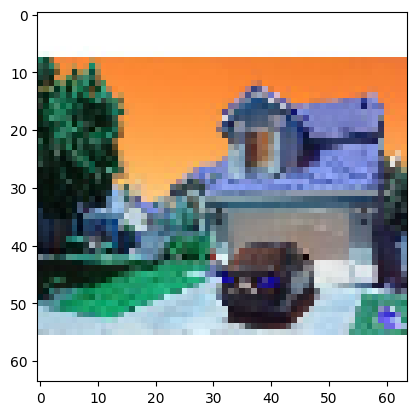

In [70]:
image_sample=cv2.imread(r'data\socal\pics\1013.jpg')
sample_resized=cv2.resize(image_sample,(64,64))
plt.imshow(sample_resized)

In [93]:
X1_final=np.zeros(4,dtype='float32')
X1_final[0]=attr_sample['n_citi']/citim
X1_final[1]=attr_sample['bed']/bm
X1_final[2]=attr_sample['bath']/bathm
X1_final[3]=attr_sample['sqft']/sqftm
y_ground_truth=attr_sample['price']

X2_final=sample_resized/255.0
print(X1_final.shape," ",X2_final.shape)

y_pred=model.predict([np.reshape(X1_final,(1,4)),np.reshape(X2_final,(1,64,64,3))])

print("Actual price: ",attr_sample['price'].values)
print("Predicted price: ",y_pred*pricem)

(4,)   (64, 64, 3)
1/1 [==============================] - 0s 155ms/step
Actual price:  [314900]
Predicted price:  [[208605.52787781]]
